In [1]:
# Let's start with importing the necessary libraries as we go
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import acf

import warnings
warnings.filterwarnings("ignore")

### -------------------------------------------------------------------------------------------------------------
## (0) Choose an ETF to work with in the Google spreadsheet.

#### We have chosen the second ticker "(VUG) Vanguard Growth Index Fund" for this project.

### -------------------------------------------------------------------------------------------------------------
## (1) Using autocorrelation and partial autocorrelation functions determine a few alternative ARMA(p,q)
## representations that can potentially represent the time-series behavior of the ETF return.


In [42]:
# Load VUG data
ticker = 'VUG'
data = yf.download(ticker, start='2010-02-01', end='2023-11-01', interval = "1mo")
returns = data['Adj Close'].pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


### Let's start with a test on an ARMA (1, 1)

In [44]:
# fit ARMA model to generated data
model = sm.tsa.ARIMA(returns, order=(1,0,1))
results = model.fit()

# Print the model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  219
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 384.553
Date:                Sun, 26 Nov 2023   AIC                           -761.106
Time:                        17:26:31   BIC                           -747.550
Sample:                             0   HQIC                          -755.631
                                - 219                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0094      0.000     20.049      0.000       0.009       0.010
ar.L1          0.9247      0.034     26.950      0.000       0.857       0.992
ma.L1         -0.9997      0.582     -1.717      0.0

### Also test an AR(1) model, since ma.L1 shown statistical insignificance with 0.086 > 0.05

In [48]:
# fit ARMA model to generated data
model = sm.tsa.ARIMA(returns, order=(1,0,0))
results = model.fit()

# Print the model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  219
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 381.425
Date:                Sun, 26 Nov 2023   AIC                           -756.849
Time:                        17:29:52   BIC                           -746.682
Sample:                             0   HQIC                          -752.743
                                - 219                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0091      0.003      3.031      0.002       0.003       0.015
ar.L1          0.0295      0.071      0.417      0.677      -0.109       0.168
sigma2         0.0018      0.000     13.471      0.0

### This proved to be worse than the above model, since ar.L1 has a statistical insignificance with 0.677 > 0.05

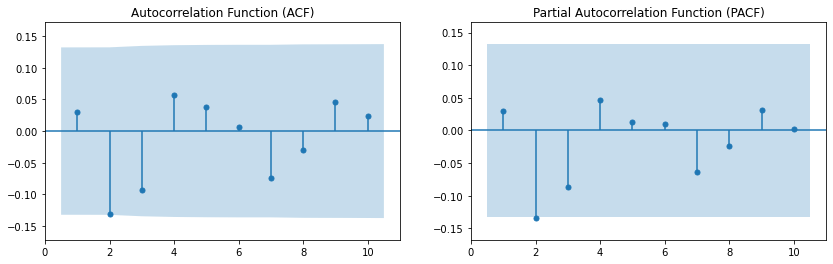

In [47]:
# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(returns, lags=10, alpha= 0.05, auto_ylims=True, zero=False, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

plot_pacf(returns, lags=10, alpha = 0.05, auto_ylims=True, zero=False, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()

### It seems when we take a look at the returns on ACF and PACF;
### We have a "cut-off" in lag 2 in ACF, a "die-out" in lag 2 in PACF
### Therefore, we should consider an ARMA(2, 2) model

### -------------------------------------------------------------------------------------------------------------
## (2) Estimate the models identified in the previous part.

In [38]:
# fit ARMA model to generated data
model = sm.tsa.ARIMA(returns, order=(2,0,2))
results = model.fit()

# Print the model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  219
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 384.667
Date:                Sun, 26 Nov 2023   AIC                           -757.335
Time:                        17:15:28   BIC                           -737.000
Sample:                             0   HQIC                          -749.122
                                - 219                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0090      0.003      3.310      0.001       0.004       0.014
ar.L1          0.4373      0.241      1.814      0.070      -0.035       0.910
ar.L2         -0.6607      0.243     -2.717      0.0

### Taking a look at ar.L2 and ma.L2 we see p-values less than 0.05, pointing out to a statistical significance

### -------------------------------------------------------------------------------------------------------------
## (3) Apply diagnostic checks on the estimated models and modify the models if necessary. Repeat steps 1 and 2 to the modified models.

### The p-value of 0.93 for Ljung-Box indicates that there is no significant autocorrelation at lag 1, 
### suggesting that the model has adequately captured the temporal dependencies in the data.
### The test for heteroskedasticity indicates a p-value of 0.00, suggesting that there is evidence to reject the null hypothesis of homoskedasticity. 
### In other words, the variance of the residuals is not constant across observations.
### So, while the model appears to be reasonably well-specified, it's always a good practice to potentially iterate on the model based on diagnostic results.

### -------------------------------------------------------------------------------------------------------------
## (4) State the unique model you decided on and report the regression results.

### Based on the statistical significance of coefficients and on the diagnostics, we have decided on the model of ARMA(2, 2) for monthly returns data.

### -------------------------------------------------------------------------------------------------------------
## (5) Follow the steps above, 1 to 4, separately for ETF returns at daily and monthly frequencies.

In [49]:
# Let's obtain the daily data this time
daily_data = yf.download(ticker, start='2010-02-01', end='2023-11-01')
d_returns = daily_data['Adj Close'].pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


### Once again let's try ARMA(1, 1)

In [52]:
# ARMA(1, 1)
model = sm.tsa.ARIMA(d_returns, order=(1,0,1))
results = model.fit()

# Print the model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3461
Model:                 ARIMA(1, 0, 1)   Log Likelihood               10313.828
Date:                Sun, 26 Nov 2023   AIC                         -20619.656
Time:                        17:55:12   BIC                         -20595.058
Sample:                             0   HQIC                        -20610.872
                               - 3461                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      2.917      0.004       0.000       0.001
ar.L1         -0.5256      0.061     -8.547      0.000      -0.646      -0.405
ma.L1          0.4391      0.065      6.744      0.0

### P-values for the coefficients seems statistically significant. But we should make our observations on ACF and PACF to decide on the model.

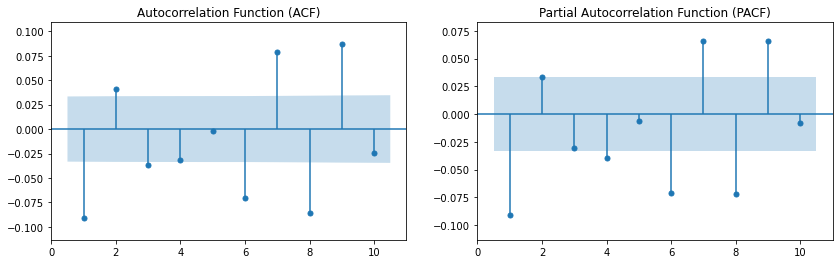

In [53]:
# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(d_returns, lags=10, alpha= 0.05, auto_ylims=True, zero=False, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

plot_pacf(d_returns, lags=10, alpha = 0.05, auto_ylims=True, zero=False, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()

### It seems we have ARMA(1, 1), but we need to also test for MA(3), MA(4) and AR(2)

In [54]:
# MA(3)
model = sm.tsa.ARIMA(d_returns, order=(0,0,3))
results = model.fit()

# Print the model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3461
Model:                 ARIMA(0, 0, 3)   Log Likelihood               10316.641
Date:                Sun, 26 Nov 2023   AIC                         -20623.282
Time:                        17:55:18   BIC                         -20592.535
Sample:                             0   HQIC                        -20612.303
                               - 3461                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      2.883      0.004       0.000       0.001
ma.L1         -0.0839      0.009     -9.293      0.000      -0.102      -0.066
ma.L2          0.0323      0.008      4.012      0.0

In [55]:
# MA(4)
model = sm.tsa.ARIMA(d_returns, order=(0,0,4))
results = model.fit()

# Print the model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3461
Model:                 ARIMA(0, 0, 4)   Log Likelihood               10317.700
Date:                Sun, 26 Nov 2023   AIC                         -20623.401
Time:                        17:55:30   BIC                         -20586.505
Sample:                             0   HQIC                        -20610.225
                               - 3461                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      2.917      0.004       0.000       0.001
ma.L1         -0.0745      0.010     -7.791      0.000      -0.093      -0.056
ma.L2          0.0259      0.008      3.270      0.0

In [56]:
# AR(2)
model = sm.tsa.ARIMA(d_returns, order=(2,0,0))
results = model.fit()

# Print the model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3461
Model:                 ARIMA(2, 0, 0)   Log Likelihood               10314.299
Date:                Sun, 26 Nov 2023   AIC                         -20620.599
Time:                        17:55:45   BIC                         -20596.001
Sample:                             0   HQIC                        -20611.815
                               - 3461                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      2.846      0.004       0.000       0.001
ar.L1         -0.0875      0.009     -9.600      0.000      -0.105      -0.070
ar.L2          0.0334      0.008      3.979      0.0

### Now upon taking a look at both models, we have first checked the log likelihood, in an effort to select the highest,
### yet the numbers are too close to each other.
### Then, we have taken a look at the AIC and BIC values of both models, once again prompting close values.
### P-values for both coefficients for the relevant models look statistically significant < 0.05
### So we look at the diagnostics values:
#### --------------------------------------

#### MA(3) : Ljung-Box (L1) (Q): 0.05 , Prob(Q): 0.83
#### MA(4) : Ljung-Box (L1) (Q): 0.69 , Prob(Q): 0.41
#### AR(2) : Ljung-Box (L1) (Q): 0.00 , Prob(Q): 0.95

### Among the three models, the AR(2) model has the highest p-value (0.95), indicating that the residuals from this model have the least evidence of autocorrelation.

## ======================================================================
## Project by: Dr. Hasan Apaydın, N. Emir Eğilli, Hakan Tokdoğan, Kerimcan Uzun